In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For the presentation's sake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
#Rows and columns
print(df.shape)

#Basic dataset info
df.info()

(36275, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arr

<h1 style="font-weight: bold; font-size: 2rem; text-align: center;">Data Overview</h1>

<h3>
    Dataset and the context paragraph taken from kaggle, more precisely from
    <a href="https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data">here =)</a>
</h3>

<h5>Context</h5>
<p>
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.
</p>

<h5>Parameters Description</h5>
<pre>
-Booking_ID: unique identifier of each booking
-no_of_adults: Number of adults
-no_of_children: Number of Children
-no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

-no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
-type_of_meal_plan: Type of meal plan booked by the customer:
-required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
-room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

-lead_time: Number of days between the date of booking and the arrival date
-arrival_year: Year of arrival date
-arrival_month: Month of arrival date
-arrival_date: Date of the month

-market_segment_type: Market segment designation.
-repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
-no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
-no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

-avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
-no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
-booking_status: Flag indicating if the booking was canceled or not.
</pre>



In [4]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


<h4>Goals for this analysis are:</h4>
<pre>
-Basic overview of the dataset, going through correlations between parameters
-predicting if the customer is going to honor the reservation or cancel it
</pre>

In [5]:
#Checking for empty values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
#Checking number of unique values for each parameter
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [7]:
# Checking for duplicated rows
duplicate_rows = df[df.duplicated()]

print("Duplicated Rows:")
print(duplicate_rows)

Duplicated Rows:
Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


<h5>Checking if any of the numerical values are negative...</h5>
<pre>
...because none of them should be.
</pre>

In [9]:
#Negative numerical values check
numerical_columns = df.select_dtypes(include='number').columns

for col in numerical_columns:
    negative_values_exist = (df[col] < 0).any()
    if negative_values_exist:
        print(f"There are negative values in column '{col}'.")
    else:
        print(f"No negative values in column '{col}'.")

No negative values in column 'no_of_adults'.
No negative values in column 'no_of_children'.
No negative values in column 'no_of_weekend_nights'.
No negative values in column 'no_of_week_nights'.
No negative values in column 'required_car_parking_space'.
No negative values in column 'lead_time'.
No negative values in column 'arrival_year'.
No negative values in column 'arrival_month'.
No negative values in column 'arrival_date'.
No negative values in column 'repeated_guest'.
No negative values in column 'no_of_previous_cancellations'.
No negative values in column 'no_of_previous_bookings_not_canceled'.
No negative values in column 'avg_price_per_room'.
No negative values in column 'no_of_special_requests'.


<pre>
Well, no negative numerical values here :)
</pre>

<h1 style="font-weight: bold; font-size: 2rem; text-align: center;">Data Analysis</h1>

<h3>Acquirers of Rooms</h3>

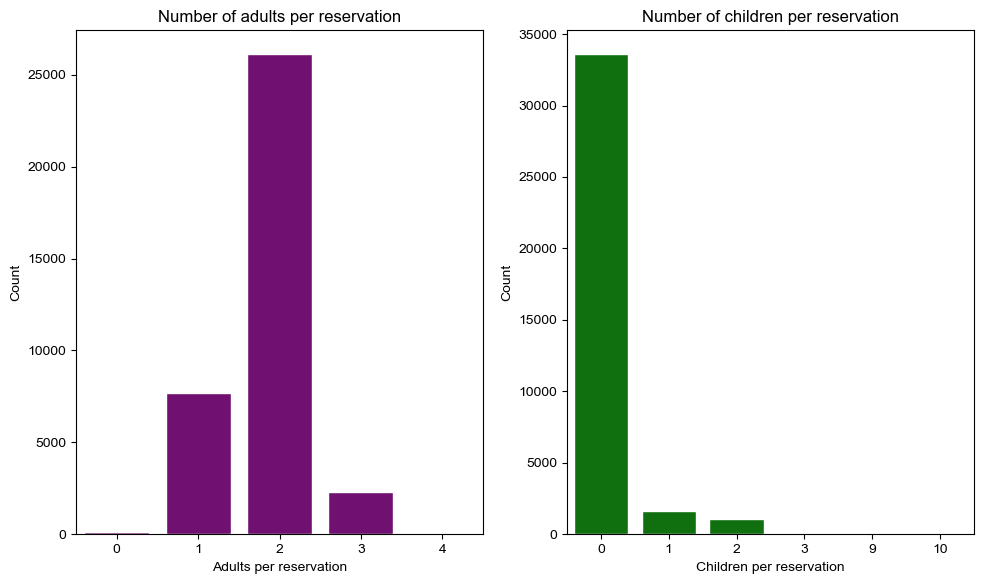

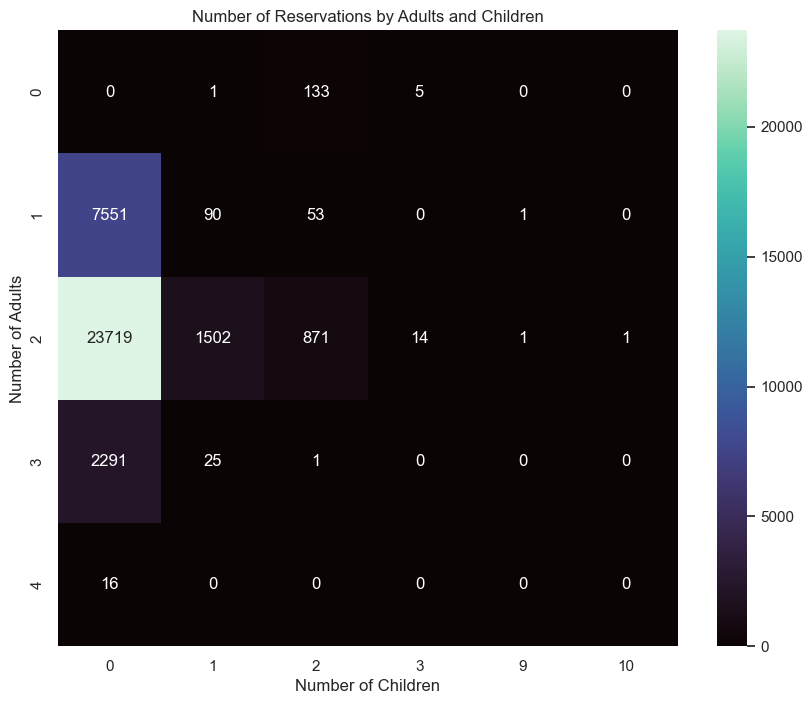

Description for adults 

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64


Description for children 

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

 Sums of each compared (adults vs children):
66926 > 3819


In [10]:
#Adults to children comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6)) 

sns.set(style="whitegrid")

sns.countplot(data=df, x='no_of_adults', color='purple', ax=axes[0])
axes[0].set_title('Number of adults per reservation')
axes[0].set_xlabel('Adults per reservation')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='no_of_children', color='green', ax=axes[1])
axes[1].set_title('Number of children per reservation')
axes[1].set_xlabel('Children per reservation')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#Heatmap 
plt.figure(figsize=(10, 8))

heatmap_data = df.groupby(['no_of_adults', 'no_of_children']).size().unstack(fill_value=0)
sns.heatmap(data=heatmap_data, annot=True, fmt='d', cmap='mako')
plt.title('Number of Reservations by Adults and Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Adults')

plt.show()

print('Description for adults \n')
print(df['no_of_adults'].describe())
print("\n")

print('Description for children \n')
print(df['no_of_children'].describe())

print('\n Sums of each compared (adults vs children):')
print(f"{df['no_of_adults'].sum()} > {df['no_of_children'].sum()}")

<h5>In conclusion...</h5>
<pre>
...from the graphs we can conclude that:
    -the biggest cluster of values is for groups of 1-3 for adults and 0-2 for children
    -the most common reservations are made by adults without any children onboard (obviously =) followed by one adult person reservations, the remaining groupings are far far less common
</pre>

<h3>Booking Nights</h3>

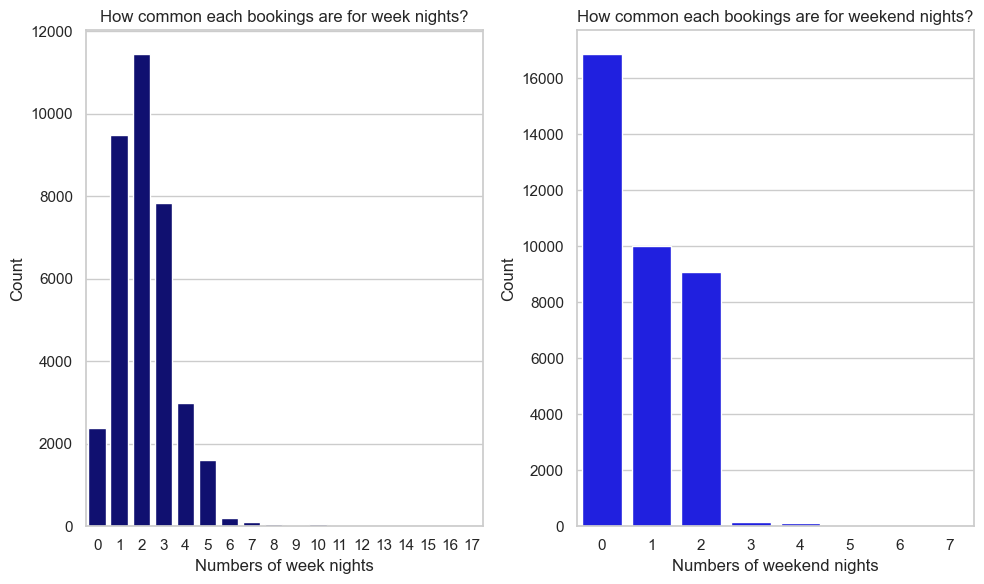

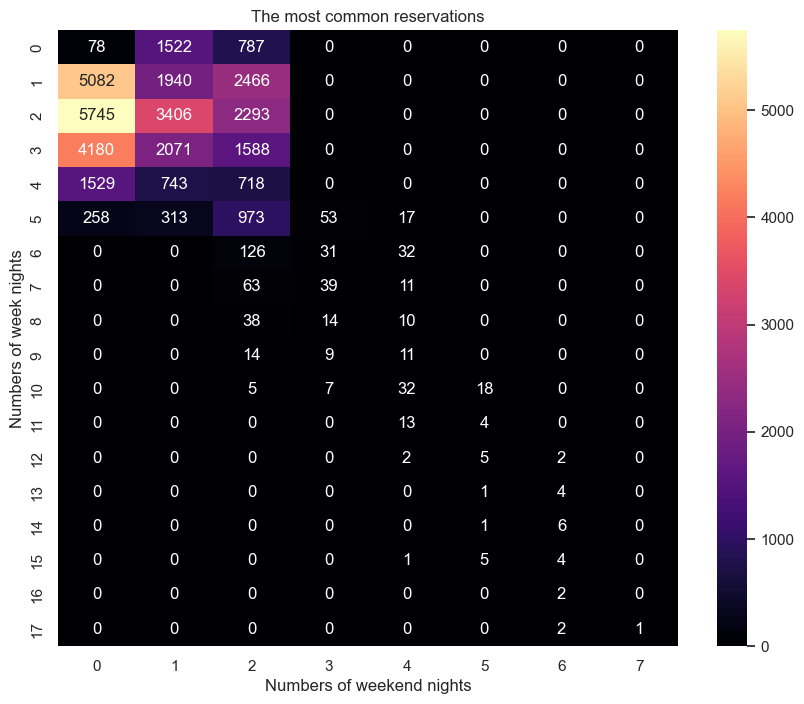

Week nights description 

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64


Weekend nights description 

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

 Sums of each compared (week nights vs weekend nights):
79961 = 79961


In [11]:
#Week nights vs weekend nights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.set(style="whitegrid")

sns.countplot(data=df, x='no_of_week_nights', color='navy', ax=axes[0])
axes[0].set_title('How common each bookings are for week nights?')
axes[0].set_xlabel('Numbers of week nights')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='no_of_weekend_nights', color='blue', ax=axes[1])
axes[1].set_title('How common each bookings are for weekend nights?')
axes[1].set_xlabel('Numbers of weekend nights')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#Heatmap 
plt.figure(figsize=(10, 8))

heatmap_data = df.groupby(['no_of_week_nights', 'no_of_weekend_nights']).size().unstack(fill_value=0)
sns.heatmap(data=heatmap_data, annot=True, fmt='d', cmap='magma')
plt.title('The most common reservations')
plt.xlabel('Numbers of weekend nights')
plt.ylabel('Numbers of week nights')

plt.show()

print('Week nights description \n')
print(df['no_of_week_nights'].describe())
print("\n")

print('Weekend nights description \n')
print(df['no_of_weekend_nights'].describe())

print('\n Sums of each compared (week nights vs weekend nights):')
print(f"{df['no_of_week_nights'].sum()} = {df['no_of_week_nights'].sum()}")

<h5>In conclusion...</h5>
<pre>
...we can see that:
    -the biggest cluster of values is for groups of 1-3 for week nights reservations and 0-2 for weekend nights reservations
    -the most common reservations include 1-3 adults with no children, followed by 1-3 adults with 1-2 children. The rest is considerably less common
</pre>

<h3>Meal plan in comparison</h3>

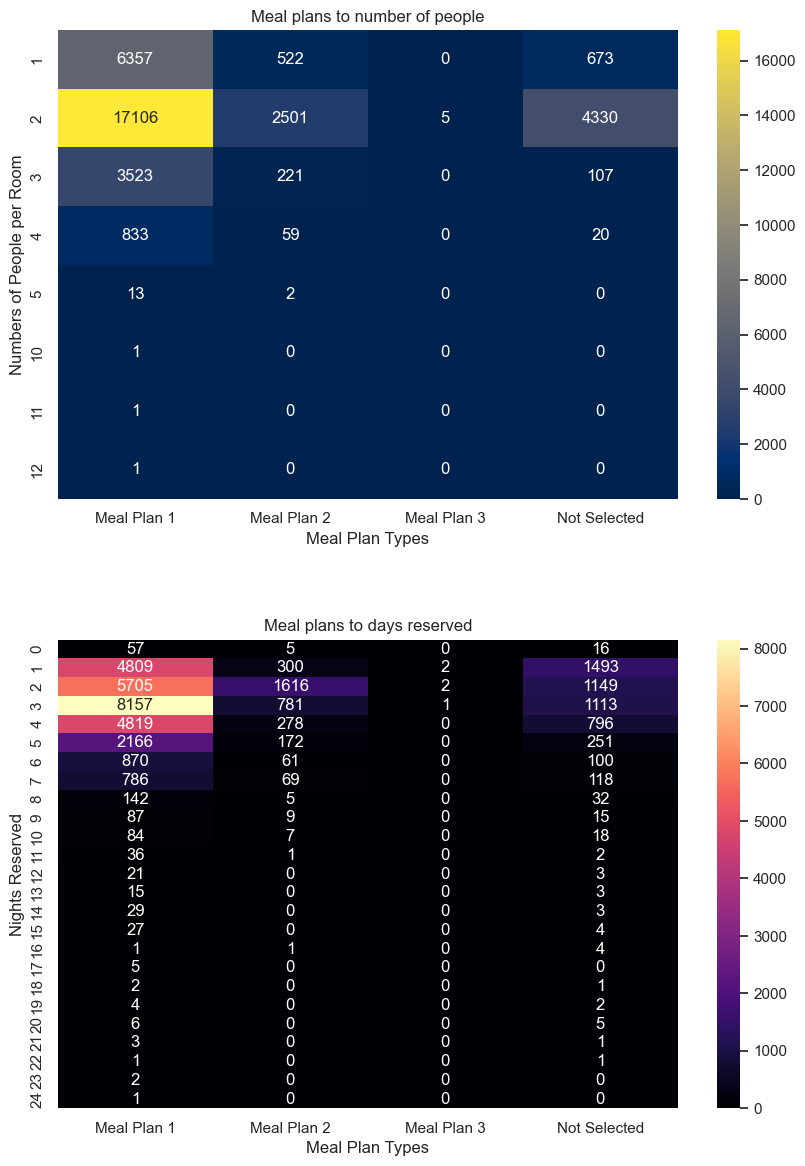

In [12]:
#Meal plans regarding number of people booked and number of nights reserved
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,14))

plt.subplots_adjust(hspace=0.3)

#People vs Meal Plan
df['people_in_total'] = df['no_of_adults'] + df['no_of_children']
people_meals = pd.crosstab(df['people_in_total'], df['type_of_meal_plan'])
sns.heatmap(data=people_meals, annot=True, fmt='d', cmap='cividis', ax=axes[0])
axes[0].set_title('Meal plans to number of people')
axes[0].set_xlabel('Meal Plan Types')
axes[0].set_ylabel('Numbers of People per Room')

#Nights Booked vs Meal Plan
df['total_reserved_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
nights_meals = pd.crosstab(df['total_reserved_nights'], df['type_of_meal_plan'])
sns.heatmap(data=nights_meals, annot=True, fmt='d', cmap='magma', ax=axes[1])
axes[1].set_title('Meal plans to days reserved')
axes[1].set_xlabel('Meal Plan Types')
axes[1].set_ylabel('Nights Reserved')

plt.show()

<h5>In conclusion...</h5>
<pre>
...we can see that:
    -the most common meal plan is the meal plan type 1, it is the most common amongst groups of 1-2 people which may mean it is the smallest one for example
</pre>

<h3>Reserved Parking Space</h3>

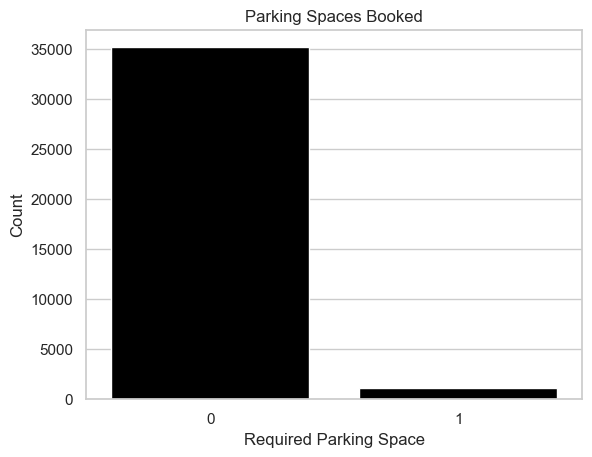

Parking Space in Total: 

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


In [13]:
sns.countplot(data=df, x='required_car_parking_space', color='black')

plt.figsize=(10,8)
sns.set_style('whitegrid')

plt.title('Parking Spaces Booked')
plt.xlabel('Required Parking Space')
plt.ylabel('Count')

plt.show()

#Sums for each unique value
print("Parking Space in Total: \n")
print(df['required_car_parking_space'].value_counts())

<h5>In conclusion...</h5>
<pre>
...there is not much there to conclude :). Only a very small portion of reservations include a parking spot.
</pre>

<h3>Reserved Room Types</h3>

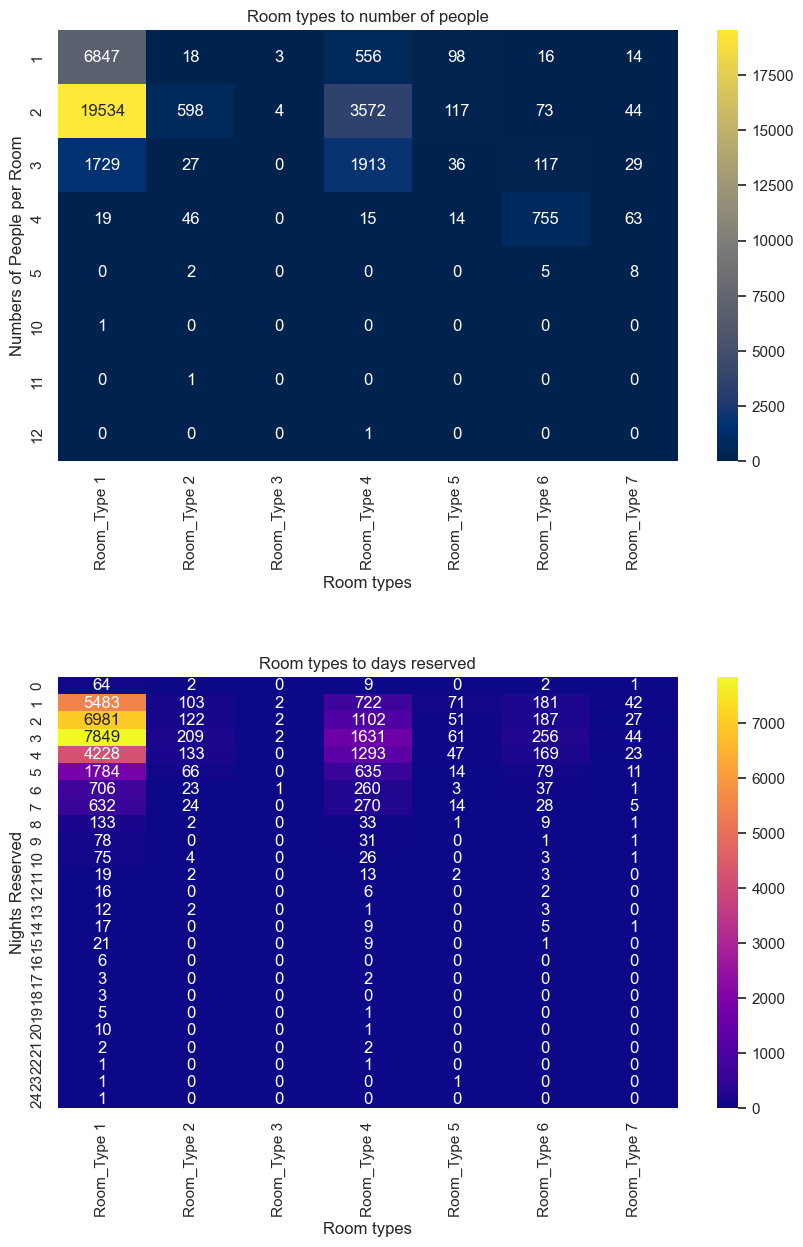

Popularity of Room Types in %: 

room_type_reserved
Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: proportion, dtype: float64


In [14]:
#Room types regarding number of people booked and number of nights reserved
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,14))

plt.subplots_adjust(hspace=0.5)

#People vs Room types
people_rooms = pd.crosstab(df['people_in_total'], df['room_type_reserved'])
sns.heatmap(data=people_rooms, annot=True, fmt='d', cmap='cividis', ax=axes[0])
axes[0].set_title('Room types to number of people')
axes[0].set_xlabel('Room types')
axes[0].set_ylabel('Numbers of People per Room')

#Nights Booked vs Room types
nights_rooms = pd.crosstab(df['total_reserved_nights'], df['room_type_reserved'])
sns.heatmap(data=nights_rooms, annot=True, fmt='d', cmap='plasma', ax=axes[1])
axes[1].set_title('Room types to days reserved')
axes[1].set_xlabel('Room types')
axes[1].set_ylabel('Nights Reserved')

plt.show()

#Popularity of different room types
room_type_percentages = df['room_type_reserved'].value_counts(normalize=True) * 100

print("Popularity of Room Types in %: \n")
print(room_type_percentages)

<h5>In conclusion...</h5>
<pre>
...we can conclude that:
    -"Room_Type 1" is the most picked one, it takes up around 77.5% of dataset insertions and is very popular amongst small groups of people (1-3), but it is hard to find a pattern here, the variation in people per room is too imbalanced. 
</pre>

<h3>Lead Time</h3>

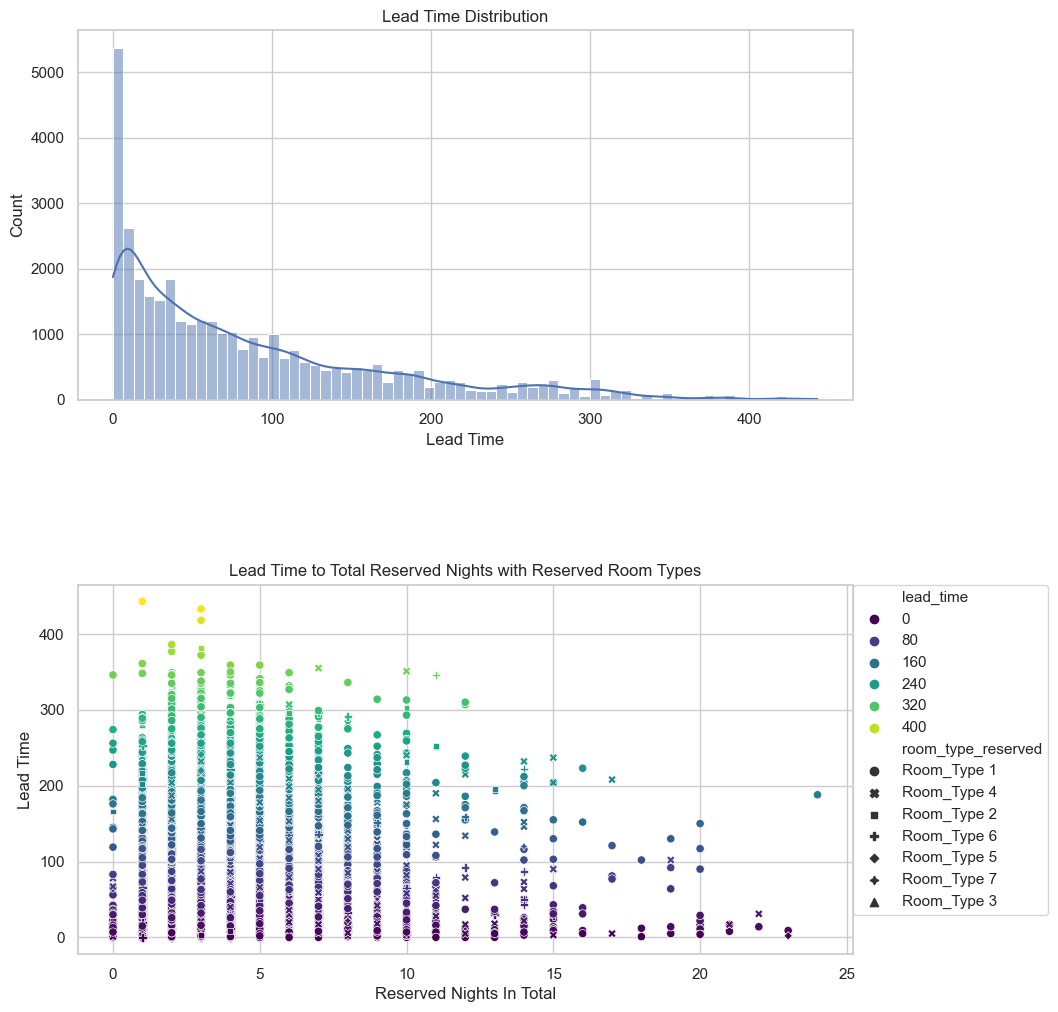

In [15]:
#Distribution of lead time in comparison to room type  
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

plt.subplots_adjust(hspace=0.5)

sns.histplot(data=df, x='lead_time', kde=True, ax=axes[0])
axes[0].set_title('Lead Time Distribution')
axes[0].set_xlabel('Lead Time')
axes[0].set_ylabel('Count')

df['total_reserved_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
sns.scatterplot(data=df, x='total_reserved_nights', y='lead_time', hue='lead_time', style='room_type_reserved', palette='viridis', ax=axes[1])
axes[1].set_title('Lead Time to Total Reserved Nights with Reserved Room Types')
axes[1].set_xlabel('Reserved Nights In Total')
axes[1].set_ylabel('Lead Time')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

plt.show()

In [16]:
#Most common lead_time values
lead_time_procentage = (df['lead_time'].value_counts() / len(df)) * 100
most_common_values_lead_time = lead_time_procentage.head(10)

print('\nMost common lead_time values\n')
for value, percentage in most_common_values_lead_time.items():
    print(f'Value: {value}, Percentage: {percentage:.2f}%')


Most common lead_time values

Value: 0, Percentage: 3.58%
Value: 1, Percentage: 2.97%
Value: 2, Percentage: 1.77%
Value: 3, Percentage: 1.74%
Value: 4, Percentage: 1.73%
Value: 5, Percentage: 1.59%
Value: 6, Percentage: 1.43%
Value: 8, Percentage: 1.20%
Value: 7, Percentage: 1.18%
Value: 12, Percentage: 1.14%


<h5>In conclusion...</h5>
<pre>
...we can see that:
    -it is hard to connect a room type to it's value based on the scatterplot
    -high values of lead time may indicate bookings in advance for peak seasons, in advance for popular events - hotels being close to them, may also indicate limited availability or huge popularity of the hotel/place
    -most common lead_time values are 0-7 ascending which may be because of, for example, people scouting for good last minute offers, hotels might have a surplus of available rooms or there might be a last minute cancelation resulting in an open, possibly encouraging spot
</pre>

<h3>Arrival Date</h3>

In [17]:
# Making a date column 
df['full_date_of_arrival'] = df['arrival_date'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_year'].astype(str)

wrong_date_list = []

for row in range(len(df)):
    try:
        pd.to_datetime(df.iloc[row]['full_date_of_arrival'], format='%d/%m/%Y')
    except:
        wrong_date_list.append(df.iloc[row]['full_date_of_arrival'])
        
unique_wrong_values = list(set(wrong_date_list))

print(f'Number of wrong dates: {len(wrong_date_list)}')
print(f'Number of unique wrong dates: {len(unique_wrong_values)}')
print(f'Peak:\n{unique_wrong_values[:5]}\n')



print(f'Number of unique years: {df["arrival_year"].nunique()}')
print(f'Number of unique month: {df["arrival_month"].nunique()}')
print(f'Number of unique days: {df["arrival_date"].nunique()}')

Number of wrong dates: 37
Number of unique wrong dates: 1
Peak:
['29/2/2018']

Number of unique years: 2
Number of unique month: 12
Number of unique days: 31


<p>
    The year 2018 is not a leap year, thus it's February has 28 days instead of 29.
    <br>
    Number of wrong dates is not significant.
    <br>
    Let's assume it was supposed to be the 1th of March instead.
</p>

In [18]:
#Changing wrong values to 1th of March 2018
mask = (df['arrival_date'] == 29) & (df['arrival_month'] == 2) & (df['arrival_year'] == 2018)

df.loc[mask, 'arrival_date'] = 1
df.loc[mask, 'arrival_month'] = 3

df['full_date_of_arrival'] = df['arrival_date'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_year'].astype(str)

# Converting the updated 'full_date_of_arrival' to datetime
df['full_date_of_arrival'] = pd.to_datetime(df['full_date_of_arrival'], format='%d/%m/%Y')

print(df['full_date_of_arrival'].head(5))

0   2017-10-02
1   2018-11-06
2   2018-02-28
3   2018-05-20
4   2018-04-11
Name: full_date_of_arrival, dtype: datetime64[ns]


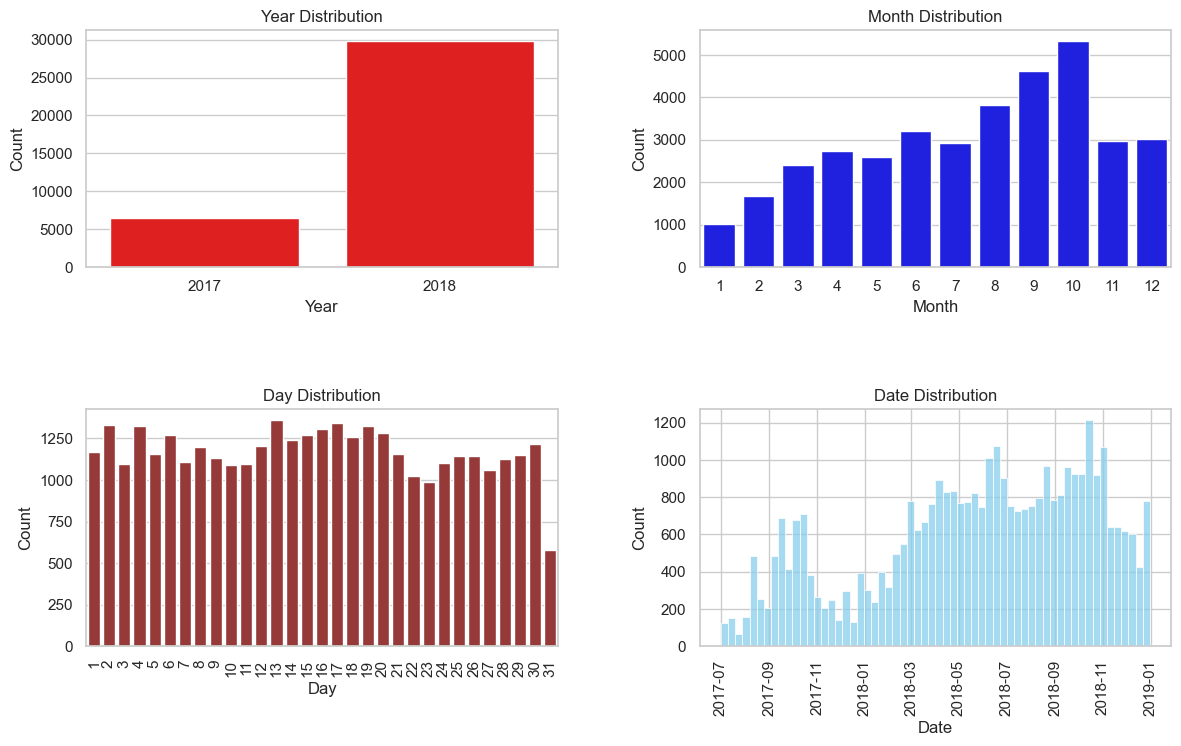

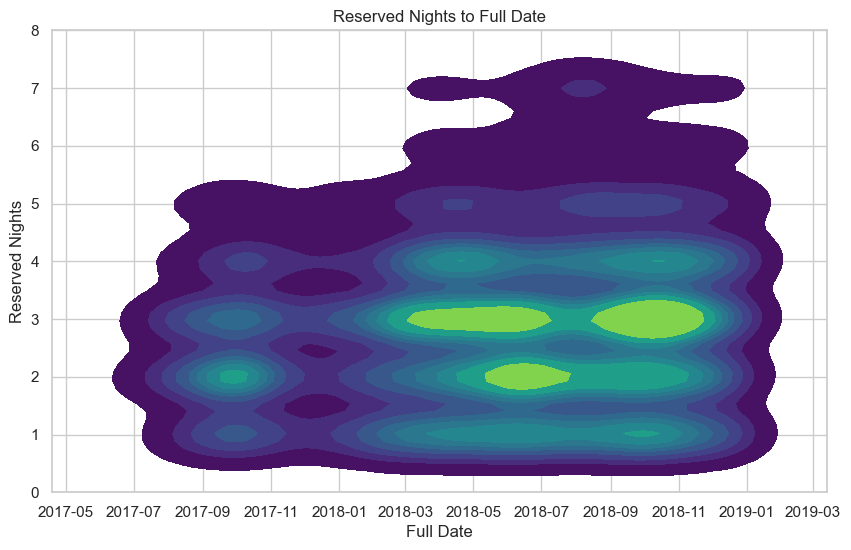

<Figure size 1600x1000 with 0 Axes>

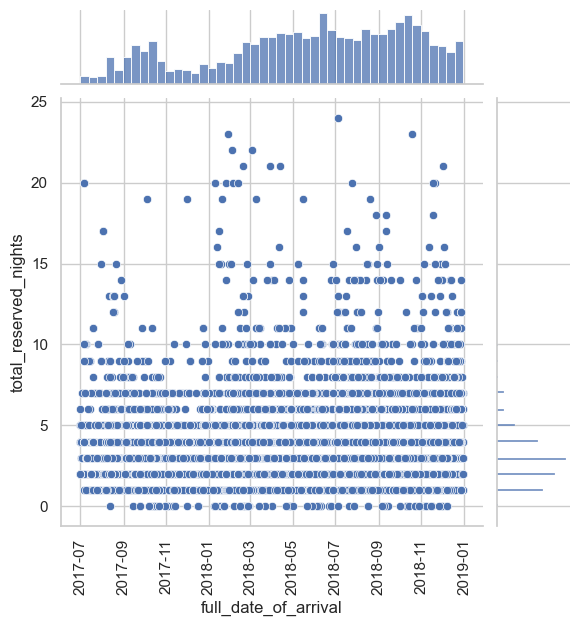

In [19]:
#Distributions for day, month and year
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

plt.subplots_adjust(hspace=0.6, wspace=0.3)

sns.countplot(data=df, x='arrival_year', color='red', ax=axes[0][0])
axes[0][0].set_title('Year Distribution')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count')

sns.countplot(data=df, x='arrival_month', color='blue', ax=axes[0][1])
axes[0][1].set_title('Month Distribution')
axes[0][1].set_xlabel('Month')
axes[0][1].set_ylabel('Count')

sns.countplot(data=df, x='arrival_date', color='brown', ax=axes[1][0])
axes[1][0].set_title('Day Distribution')
axes[1][0].set_xlabel('Day')
axes[1][0].set_ylabel('Count')
axes[1][0].tick_params(axis='x', rotation=90)

sns.histplot(data=df, x='full_date_of_arrival', bins=60, color='skyblue', ax=axes[1][1])
axes[1][1].set_title('Date Distribution')
axes[1][1].set_xlabel('Date')
axes[1][1].set_ylabel('Count')
axes[1][1].tick_params(axis='x', rotation=90)

plt.show()

plt.figure(figsize=(10, 6))
plt.ylim(0, 8)
sns.kdeplot(data=df, x='full_date_of_arrival', y='total_reserved_nights', fill=True, cmap='viridis')
plt.title('Reserved Nights to Full Date')
plt.xlabel('Full Date')
plt.ylabel('Reserved Nights')

plt.show()

plt.figure(figsize=(16, 10))
sns.jointplot(data=df, x='full_date_of_arrival', y='total_reserved_nights')
plt.tick_params(axis='x', rotation=90)

plt.show()

<h5>In conclusion...</h5>
<pre>
...we can see that:
    -the highest amount of reservations are from late summer to around the end of autumn (which makes sense because of them being peak seasons usually), they are also the longest in terms of booked nights. All that can be the result of good weather or, for example, summer holidays.
</pre>

<h3>Market Segment Type</h3>

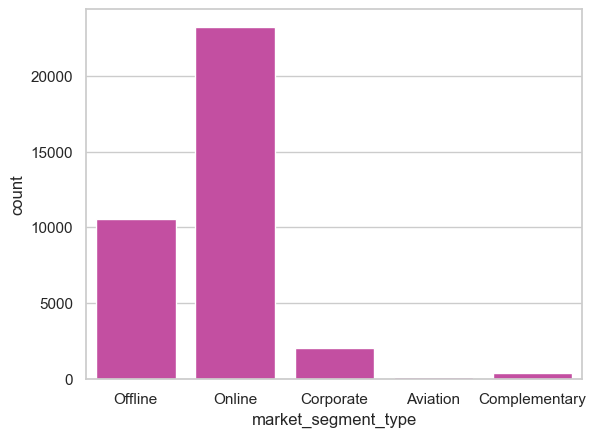

In [20]:
#Countplot
sns.countplot(data=df, x='market_segment_type', color='#D63CA9')

plt.show()

<pre>
There is not much here to say, the most common are online bookings, followed by a significant number of offline ones which may come across as strange considering how digitalized the times are. 
</pre>

<h3>Repeated Guests and Cancellations</h3>

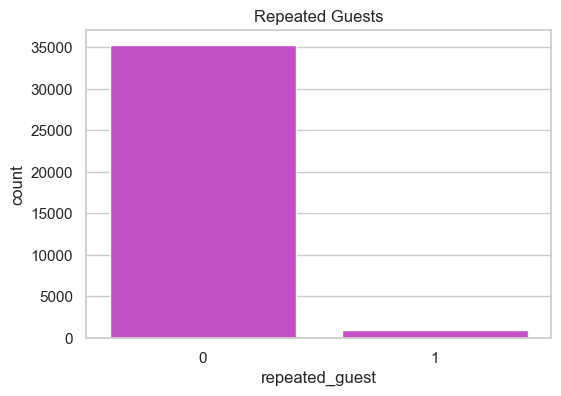

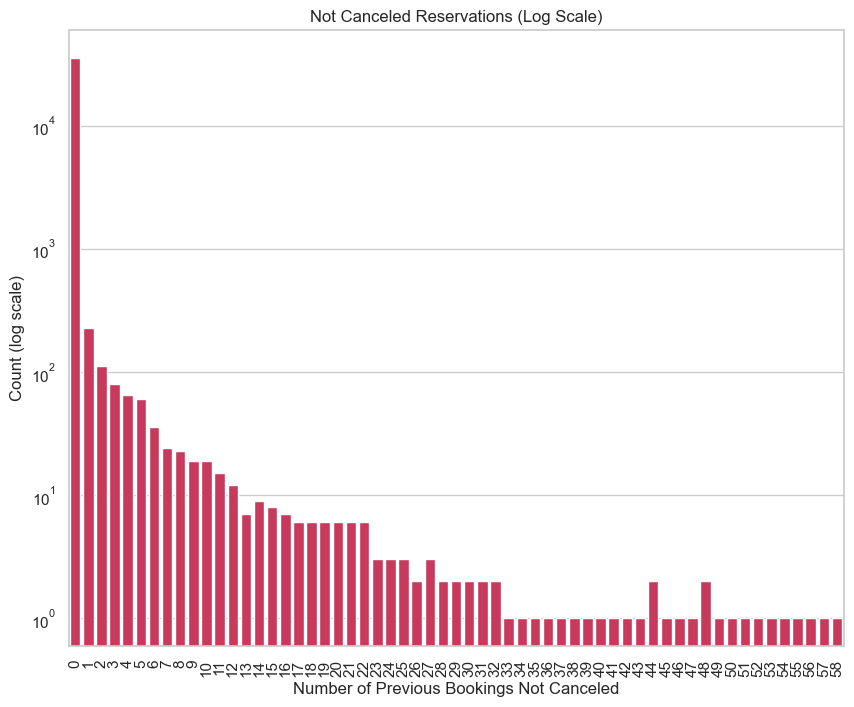

In [21]:
#Repeated guests
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='repeated_guest', color='#D63CD9')
plt.title('Repeated Guests')

plt.show()

#Not canceled
plt.figure(figsize=(10, 8))
sns.barplot(x=df["no_of_previous_bookings_not_canceled"].value_counts().index,
            y=df["no_of_previous_bookings_not_canceled"].value_counts(), color='#DE234E')
plt.yscale("log")
plt.title('Not Canceled Reservations (Log Scale)')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Count (log scale)')
plt.tick_params(axis='x', rotation=90)

plt.show()

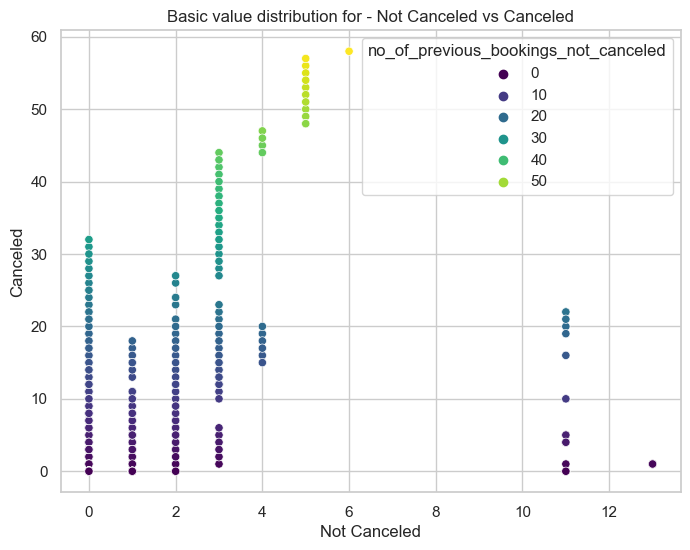

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64


Most common values for not canceled

Value: 0, Percentage: 97.76%
Value: 1, Percentage: 0.63%
Value: 2, Percentage: 0.31%
Value: 3, Percentage: 0.22%
Value: 4, Percentage: 0.18%
Value: 5, Percentage: 0.17%
Value: 6, Percentage: 0.10%
Value: 7, Percentage: 0.07%
Value: 8, Percentage: 0.06%
Value: 10, Percentage: 0.05%


In [22]:
#Not Canceled vs Canceled
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='no_of_previous_cancellations', y='no_of_previous_bookings_not_canceled', hue="no_of_previous_bookings_not_canceled", palette='viridis')
plt.title('Basic value distribution for - Not Canceled vs Canceled')
plt.xlabel('Not Canceled')
plt.ylabel('Canceled')

plt.show()

#Previous Cancellations
print(f'{df["no_of_previous_cancellations"].value_counts()}\n')

#Most common values for not canceled
not_canceled_percentage = df['no_of_previous_bookings_not_canceled'].value_counts(normalize=True) * 100
most_common_values = not_canceled_percentage.head(10)

print('\nMost common values for not canceled\n')
for value, percentage in most_common_values.items():
        print(f'Value: {value}, Percentage: {percentage:.2f}%')
    

<h5>In conclusion...</h5>
<pre>
...we can see that:
    -both cancelled and not cancelled are mostly 0, not so closely followed by 1 and with a few exceptions.
</pre>

<h3>Average Room Prices</h3>

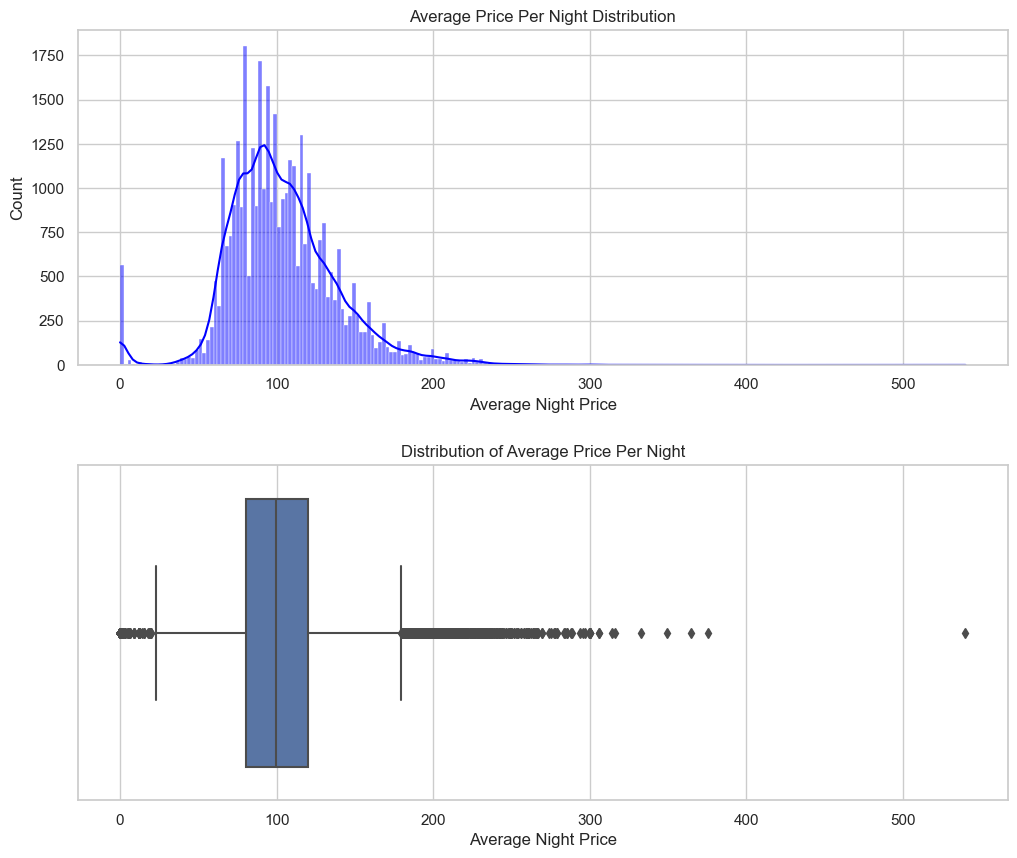

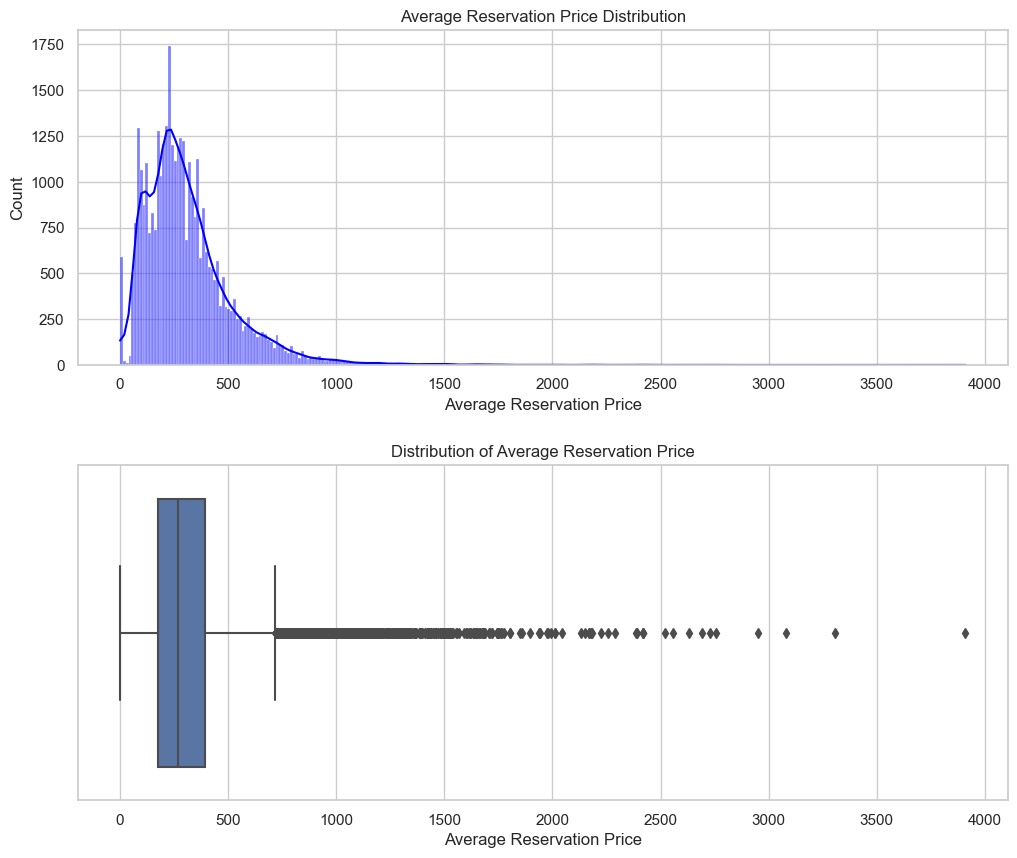

In [23]:
#Basic overview
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)

df['avg_price_per_full_reservation'] = df['avg_price_per_room'] * df['total_reserved_nights']

sns.histplot(data=df, x='avg_price_per_room', kde=True, color='blue', ax=axes[0])
axes[0].set_title('Average Price Per Night Distribution')
axes[0].set_xlabel('Average Night Price')
axes[0].set_ylabel('Count')


sns.boxplot(data=df, x='avg_price_per_room', ax=axes[1])
axes[1].set_title('Distribution of Average Price Per Night')
axes[1].set_xlabel('Average Night Price')

plt.show()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.3)

sns.histplot(data=df, x='avg_price_per_full_reservation', kde=True, color='blue', ax=axes[0])
axes[0].set_title('Average Reservation Price Distribution')
axes[0].set_xlabel('Average Reservation Price')
axes[0].set_ylabel('Count')


sns.boxplot(data=df, x='avg_price_per_full_reservation', ax=axes[1])
axes[1].set_title('Distribution of Average Reservation Price')
axes[1].set_xlabel('Average Reservation Price')

plt.show()

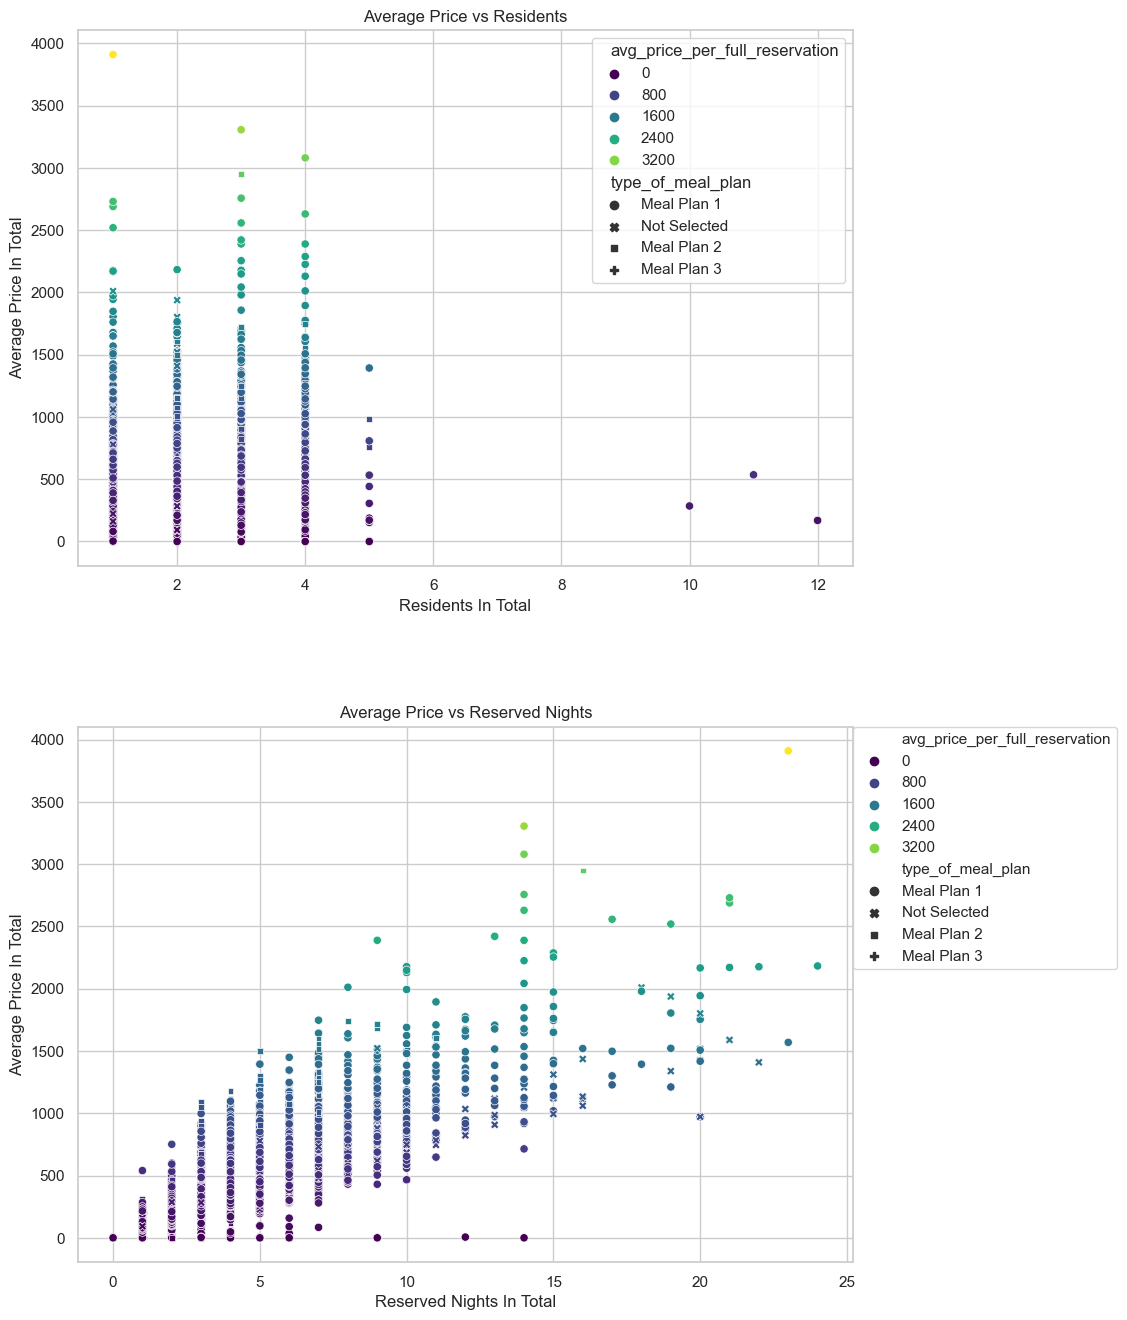

In [24]:
#Distributions of Average Price
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
plt.subplots_adjust(hspace=0.3)

df['no_of_residents'] = df['no_of_adults'] + df['no_of_children']

sns.scatterplot(data=df, x='no_of_residents', y='avg_price_per_full_reservation', hue='avg_price_per_full_reservation', style='type_of_meal_plan', palette='viridis', ax=axes[0])
axes[0].set_title('Average Price vs Residents')
axes[0].set_xlabel('Residents In Total')
axes[0].set_ylabel('Average Price In Total')


sns.scatterplot(data=df, x='total_reserved_nights', y='avg_price_per_full_reservation', hue='avg_price_per_full_reservation', style='type_of_meal_plan', palette='viridis', ax=axes[1])
axes[1].set_title('Average Price vs Reserved Nights')
axes[1].set_xlabel('Reserved Nights In Total')
axes[1].set_ylabel('Average Price In Total')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

plt.show()

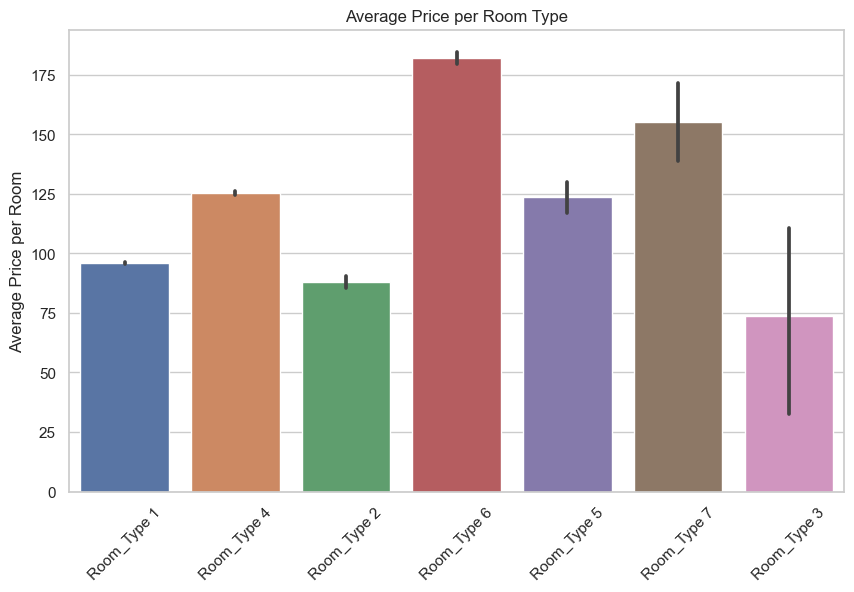

Room_Type 1 -> count: 28130
Room_Type 2 -> count: 692
Room_Type 3 -> count: 7
Room_Type 4 -> count: 6057
Room_Type 5 -> count: 265
Room_Type 6 -> count: 966
Room_Type 7 -> count: 158


In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='room_type_reserved', y='avg_price_per_room')

plt.title('Average Price per Room Type')
plt.xlabel('')
plt.ylabel('Average Price per Room')
plt.xticks(rotation=45)

plt.show()

for i, room in enumerate(df.groupby('room_type_reserved')['avg_price_per_room'].count().items()):
    print(f'{room[0]} -> count: {room[1]}')

<h5>In conclusion...</h5>
<pre>
...we can see that:
    -the prices per night oscillate around 100 euros. Above 50% of them are in 80-120 euros range more or less. Almost all of them are in around 20-180 euros range with some exceptions exceeding above or below.
    -As for the prices per full reservation, almost all of them are in 0-700 euros range with the biggest cluster of values around 200-400. Small portion exceed above even sometimes reaching thousands of euros.
</pre>

<h3>Special Requests</h3>

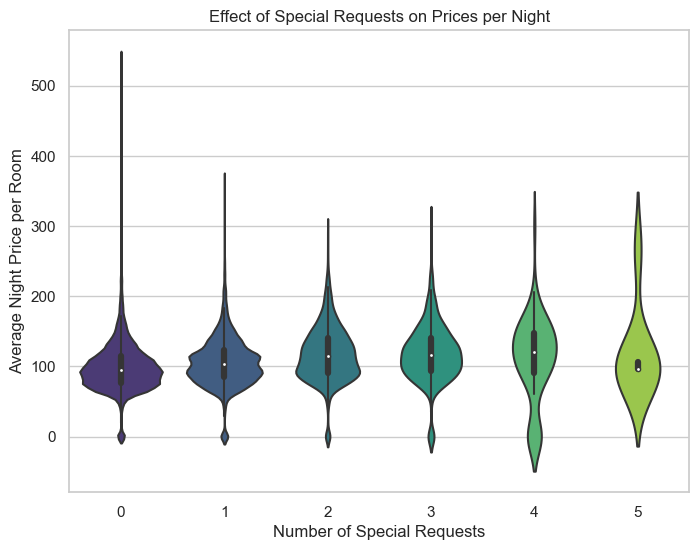

0 -> count: 19777
1 -> count: 11373
2 -> count: 4364
3 -> count: 675
4 -> count: 78
5 -> count: 8


In [26]:
#How special requests affect prices per night
plt.figure(figsize=(8, 6))

sns.violinplot(data=df, y='avg_price_per_room', x='no_of_special_requests', palette='viridis')

plt.title('Effect of Special Requests on Prices per Night')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Night Price per Room')

plt.show()

for i, request in enumerate(df.groupby('no_of_special_requests')['avg_price_per_room'].count().items()):
    print(f'{request[0]} -> count: {request[1]}')

<h3>Booking Status Overview</h3>

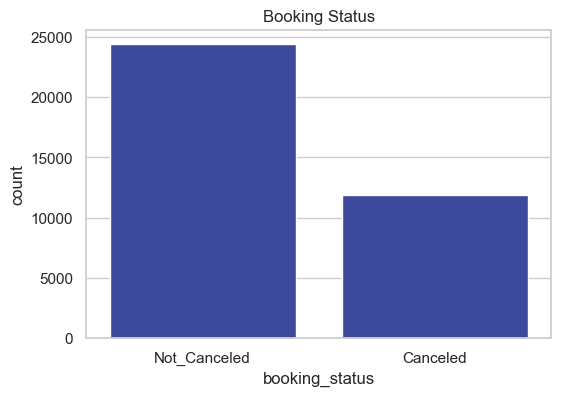

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='booking_status', color='#2E3EA9')
plt.title('Booking Status')

plt.show()

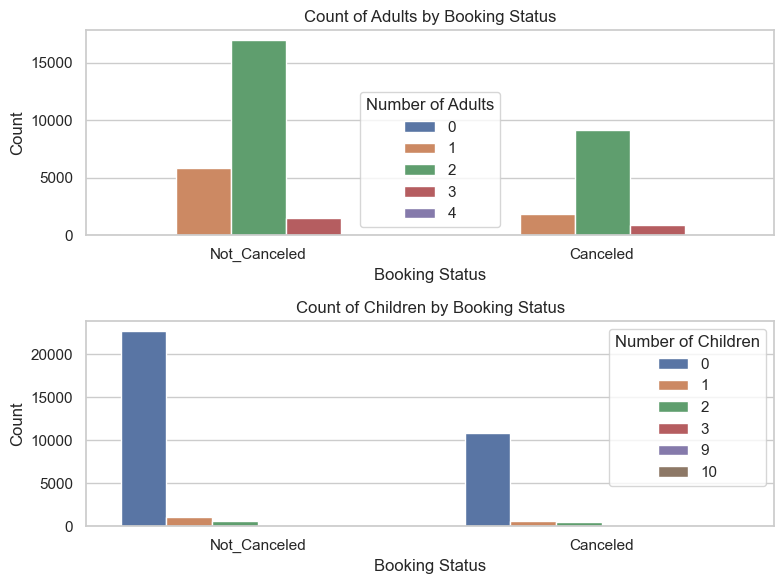

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

#Booking status vs number of adults
sns.countplot(data=df, hue='no_of_adults', x='booking_status', ax=axs[0])
axs[0].set_title('Count of Adults by Booking Status')
axs[0].set_xlabel('Booking Status')
axs[0].set_ylabel('Count')
axs[0].legend(title='Number of Adults')

#Booking status vs number of children
sns.countplot(data=df, hue='no_of_children', x='booking_status', ax=axs[1])
axs[1].set_title('Count of Children by Booking Status')
axs[1].set_xlabel('Booking Status')
axs[1].set_ylabel('Count')
axs[1].legend(title='Number of Children')

plt.tight_layout()

plt.show()

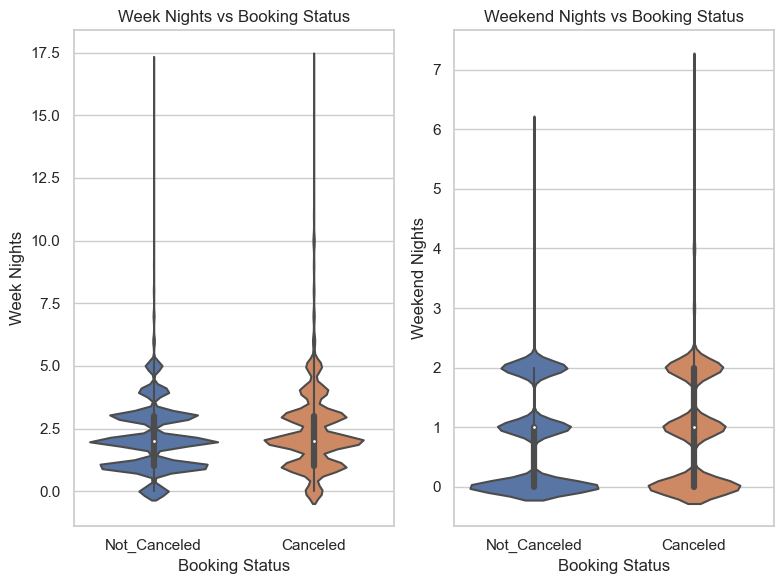

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

#Booking status vs week nights
sns.violinplot(data=df, x='booking_status', y='no_of_week_nights', ax=axs[0])
axs[0].set_title('Week Nights vs Booking Status')
axs[0].set_xlabel('Booking Status')
axs[0].set_ylabel('Week Nights')

#Booking status vs weekend nights
sns.violinplot(data=df, x='booking_status', y='no_of_weekend_nights', ax=axs[1])
axs[1].set_title('Weekend Nights vs Booking Status')
axs[1].set_xlabel('Booking Status')
axs[1].set_ylabel('Weekend Nights')

plt.tight_layout()

plt.show()

C:\Users\kubag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


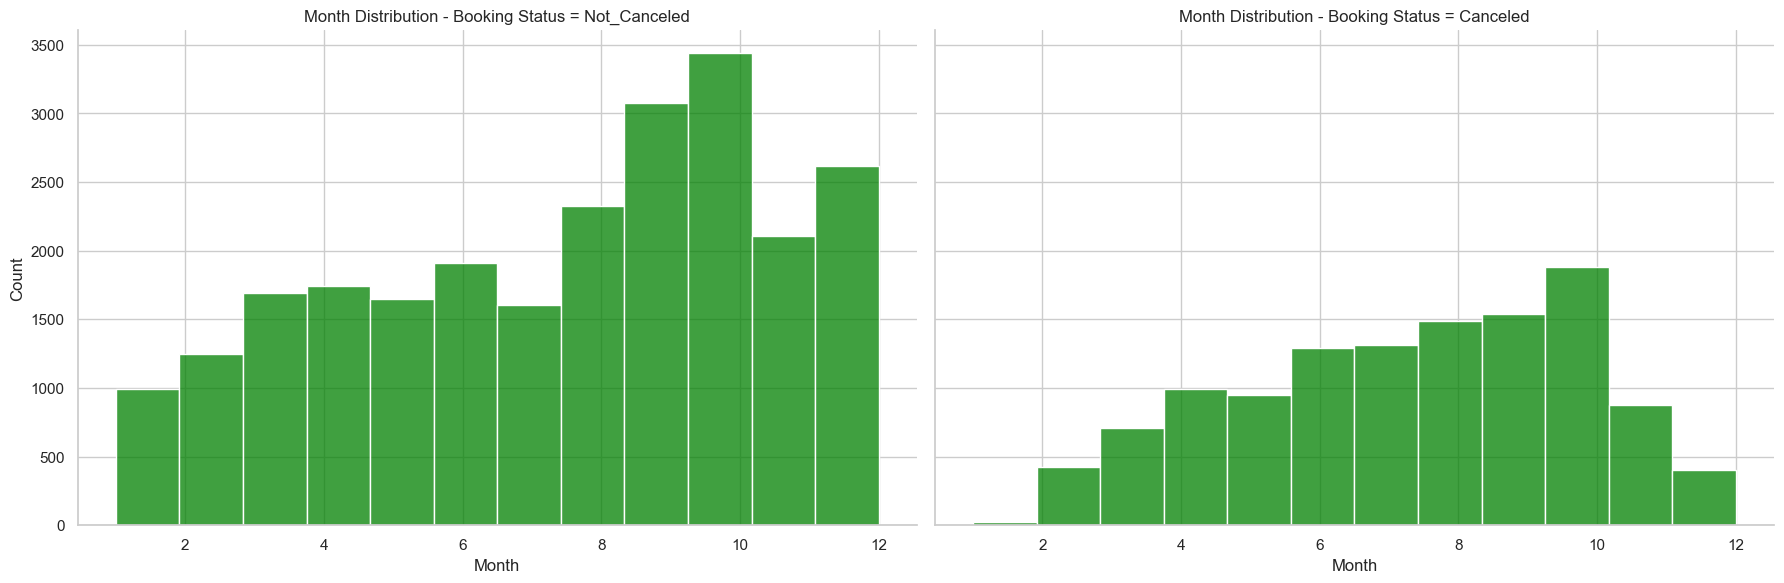

In [30]:
#Month of arrival vs booking status
g = sns.FacetGrid(df, col='booking_status', height=6, aspect=1.5)

g.map(sns.histplot, 'arrival_month', color='green', bins=12)
g.set_titles('Month Distribution - Booking Status = {col_name}')
g.set_xlabels('Month')
g.set_ylabels('Count')

plt.show()

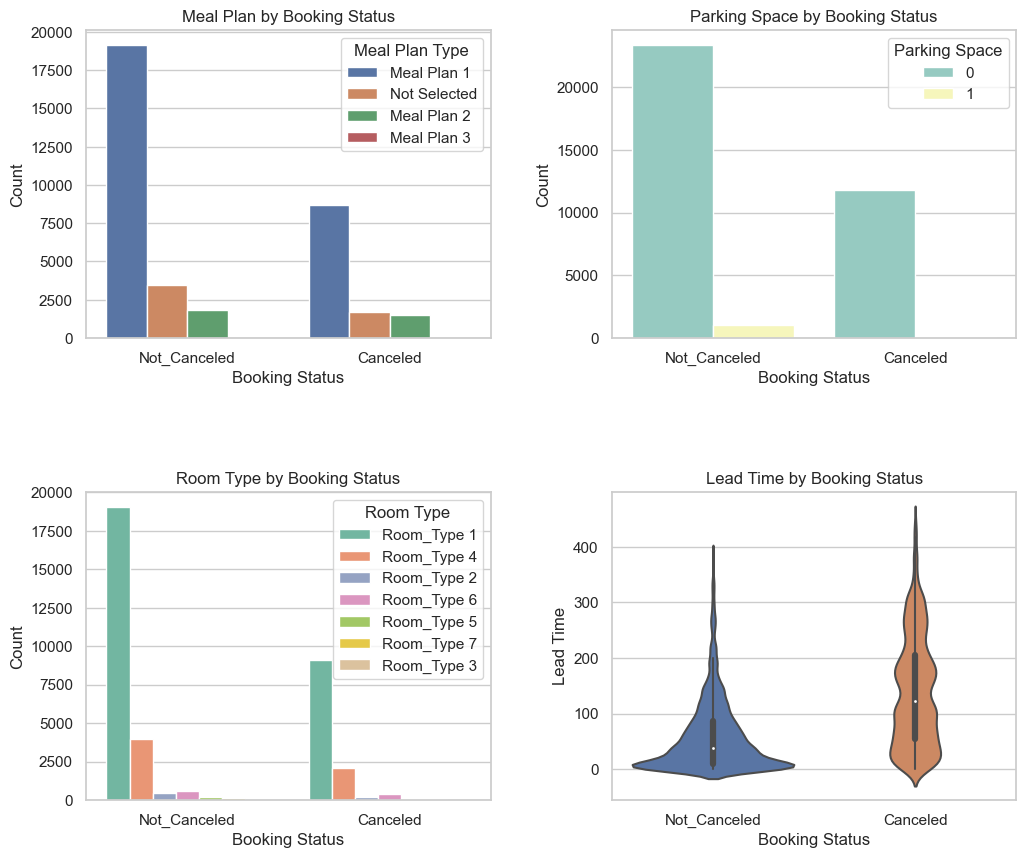

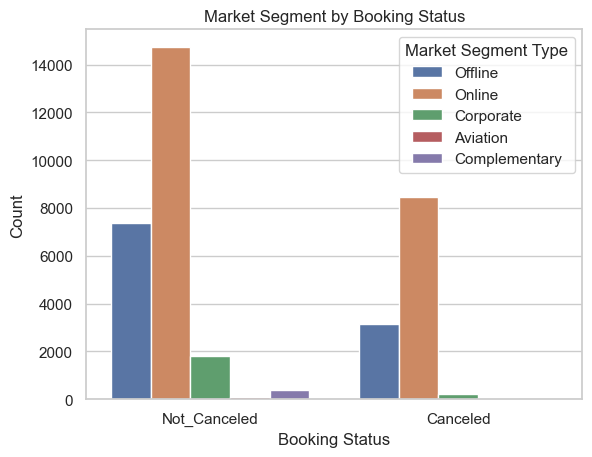

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

#Booking status vs meal plan type
sns.countplot(data=df, hue='type_of_meal_plan', x='booking_status', ax=axs[0][0])
axs[0][0].set_title('Meal Plan by Booking Status')
axs[0][0].set_xlabel('Booking Status')
axs[0][0].set_ylabel('Count')
axs[0][0].legend(title='Meal Plan Type')

#Booking status vs car parking space
sns.countplot(data=df, hue='required_car_parking_space', x='booking_status', palette='Set3', ax=axs[0][1])
axs[0][1].set_title('Parking Space by Booking Status')
axs[0][1].set_xlabel('Booking Status')
axs[0][1].set_ylabel('Count')
axs[0][1].legend(title='Parking Space')

#Booking status vs room type reserved
sns.countplot(data=df, hue='room_type_reserved', x='booking_status', palette='Set2', ax=axs[1][0])
axs[1][0].set_title('Room Type by Booking Status')
axs[1][0].set_xlabel('Booking Status')
axs[1][0].set_ylabel('Count')
axs[1][0].legend(title='Room Type')

#Booking status vs lead time
sns.violinplot(data=df, y='lead_time', x='booking_status', ax=axs[1][1])
axs[1][1].set_title('Lead Time by Booking Status')
axs[1][1].set_xlabel('Booking Status')
axs[1][1].set_ylabel('Lead Time')

plt.show()

#Booking status vs market segment type
sns.countplot(data=df, hue='market_segment_type', x='booking_status')
plt.title('Market Segment by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.legend(title='Market Segment Type')

plt.show()

Text(0, 0.5, 'Average Night Price')

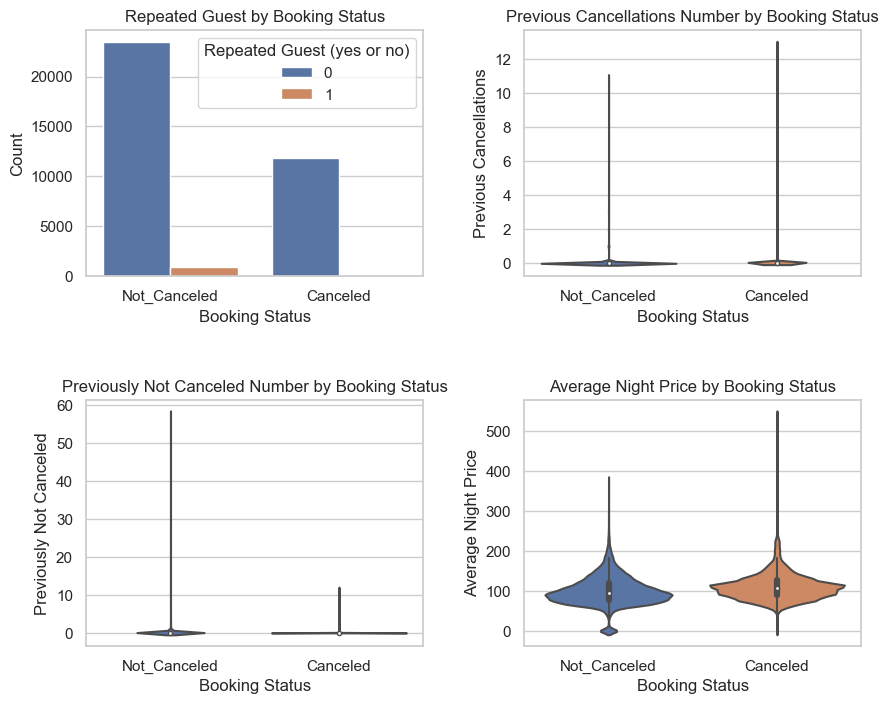

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

#Booking status vs repeated guest
sns.countplot(data=df, hue='repeated_guest', x='booking_status', ax=axs[0][0])
axs[0][0].set_title('Repeated Guest by Booking Status')
axs[0][0].set_xlabel('Booking Status')
axs[0][0].set_ylabel('Count')
axs[0][0].legend(title='Repeated Guest (yes or no)')

#Booking status vs bookings previously canceled
sns.violinplot(data=df, y='no_of_previous_cancellations', x='booking_status', ax=axs[0][1])
axs[0][1].set_title('Previous Cancellations Number by Booking Status')
axs[0][1].set_xlabel('Booking Status')
axs[0][1].set_ylabel('Previous Cancellations')

#Booking status vs bookings previously not canceled
sns.violinplot(data=df, y='no_of_previous_bookings_not_canceled', x='booking_status', ax=axs[1][0])
axs[1][0].set_title('Previously Not Canceled Number by Booking Status')
axs[1][0].set_xlabel('Booking Status')
axs[1][0].set_ylabel('Previously Not Canceled')

#Booking status vs average night price
sns.violinplot(data=df, y='avg_price_per_room', x='booking_status', ax=axs[1][1])
axs[1][1].set_title('Average Night Price by Booking Status')
axs[1][1].set_xlabel('Booking Status')
axs[1][1].set_ylabel('Average Night Price')

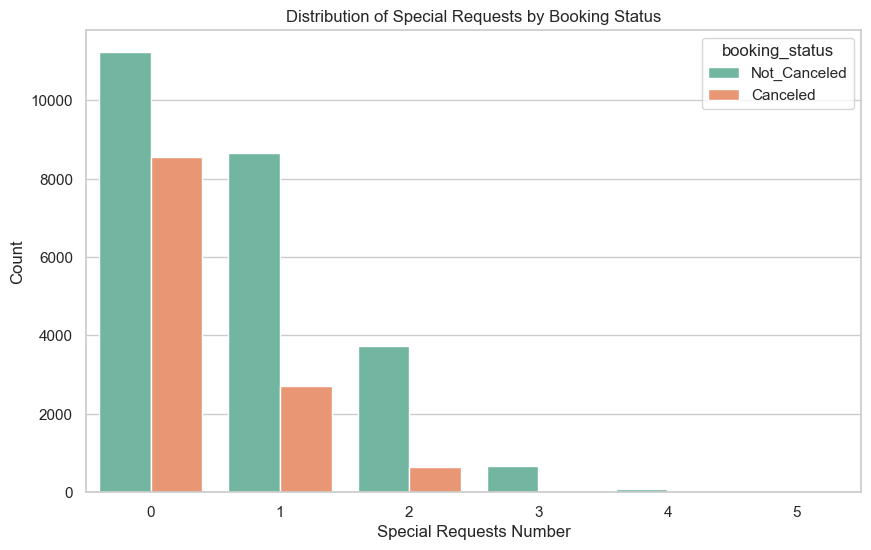

In [33]:
#no_of_special_requests vs booking_status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status', palette='Set2')
plt.title('Distribution of Special Requests by Booking Status')
plt.xlabel('Special Requests Number')
plt.ylabel('Count')
plt.show()

<h3>Predicting Booking Status</h3>

In [34]:
#Performing one-hot encoding on certain columns
encoded_df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype=int)
encoded_df['booking_status'] = encoded_df['booking_status'].map({"Not_Canceled": 0, "Canceled": 1})

In [69]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale


X = encoded_df.drop(['Booking_ID', 'people_in_total', 'total_reserved_nights', 'full_date_of_arrival',
             'booking_status', 'avg_price_per_full_reservation', 'no_of_residents'], axis=1)
y = encoded_df['booking_status']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


print("Random Forest\n")
print(classification_report(y_test, y_pred_rf))

#Dict with importances with equivalent columns
params_importances = dict(zip(X.columns, rf_classifier.feature_importances_))

#Sorting
params_importances_descending = dict(sorted(params_importances.items(), key = lambda pair: pair[1], reverse=True))

# Printing in a descending order
print("Importances descending:\n")
for param, importance in params_importances_descending.items():
    print(f"{param}: {importance}")

Random Forest

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.89      0.82      0.85      2416

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255

Importances descending:

lead_time: 0.31123473288810627
avg_price_per_room: 0.15931381564822844
no_of_special_requests: 0.10627657768354899
arrival_date: 0.09544605545454023
arrival_month: 0.08240144129587292
no_of_week_nights: 0.05326903477504562
no_of_weekend_nights: 0.036930334150592777
market_segment_type_Online: 0.026546073776352323
no_of_adults: 0.02422294811885993
arrival_year: 0.02395304466217491
market_segment_type_Offline: 0.016048548915233486
type_of_meal_plan_Meal Plan 2: 0.00911860152174792
type_of_meal_plan_Meal Plan 1: 0.007404587500806264
no_of_children: 0.006827504161596823
required_car_parking_space: 0.006666990051141691
room_type_r

In [36]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression\n")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4839
           1       0.74      0.61      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.80      0.80      0.80      7255



In [37]:
#Stratified K-fold cross validation with logistic regression

#Folds?
k=6
strat_kfold = StratifiedKFold(random_state=42, n_splits=k, shuffle=True)

scaler = StandardScaler()
ml_model = LogisticRegression()

pipeline = make_pipeline(scaler, ml_model)

print("Stratified K-fold Cross Validation With Logistic Regression\n")

#Accuracy score
log_reg_cv_scores_acc = cross_val_score(pipeline, X, y, cv=strat_kfold)

print("Accuracy Scores:", log_reg_cv_scores_acc)
print("\nMean Accuracy Score:", log_reg_cv_scores_acc.mean())
print("Standard Deviation for Accuracy Scores:", log_reg_cv_scores_acc.std())

#F-1 score
log_reg_cv_scores_f1 = cross_val_score(pipeline, X, y, cv=strat_kfold, scoring='f1')

print("\nF-1 Scores:", log_reg_cv_scores_f1)
print("\nMean F-1 Score:", log_reg_cv_scores_f1.mean())
print("Standard Deviation for F-1 Scores:", log_reg_cv_scores_f1.std())

Stratified K-fold Cross Validation With Logistic Regression

Accuracy Scores: [0.80466424 0.80301025 0.81293417 0.7975521  0.8094608  0.80363937]

Mean Accuracy Score: 0.8052101565600226
Standard Deviation for Accuracy Scores: 0.004898624952363246

F-1 Scores: [0.67985904 0.6778469  0.69324654 0.66150442 0.68831169 0.67665486]

Mean F-1 Score: 0.6795705767857214
Standard Deviation for F-1 Scores: 0.010011498007063463


In [38]:
#Stratified K-fold cross validation with random forest

#Folds?
k=6
strat_kfold_rf = StratifiedKFold(random_state=42, n_splits=k, shuffle=True)

scaler = StandardScaler()
rf_classifier =RandomForestClassifier()

rf_pipeline = make_pipeline(scaler, rf_classifier)

print("Stratified K-fold Cross Validation With Random Forest\n")

#Accuracy score
rf_cv_scores_acc = cross_val_score(rf_pipeline, X, y, cv=strat_kfold_rf)

print("Accuracy Scores:", rf_cv_scores_acc)
print("\nMean Accuracy Score:", rf_cv_scores_acc.mean())
print("Standard Deviation for Accuracy Scores:", rf_cv_scores_acc.std())

#F-1 score
rf_cv_scores_f1 = cross_val_score(rf_pipeline, X, y, cv=strat_kfold_rf, scoring='f1')

print("\nF-1 Scores:", rf_cv_scores_f1)
print("\nMean F-1 Score:", rf_cv_scores_f1.mean())
print("Standard Deviation for F-1 Scores:", rf_cv_scores_f1.std())

Stratified K-fold Cross Validation With Random Forest

Accuracy Scores: [0.89894145 0.9043996  0.90671518 0.90158783 0.90092623 0.90438379]

Mean Accuracy Score: 0.9028256804440472
Standard Deviation for Accuracy Scores: 0.002590386307527096

F-1 Scores: [0.84238271 0.84204966 0.8505141  0.84251969 0.84585391 0.85307307]

Mean F-1 Score: 0.8460655226786736
Standard Deviation for F-1 Scores: 0.004305105668032219


In [39]:
#KNN
knn_classifier = KNeighborsClassifier(n_neighbors=11, p=2, weights='uniform', algorithm='ball_tree', metric='euclidean')

knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_knn)}')
print(f'F-1 Score: {f1_score(y_test, y_pred_knn)}')

Accuracy Score: 0.8088215024121296
F-1 Score: 0.6681024168461355


In [40]:
#Hyper Parameters Tuning On The KNN Classifier
knn_classifier = KNeighborsClassifier(p=2, weights='uniform', algorithm='ball_tree', metric='euclidean')

#GridSearchCV
knn_grid_search_cv = GridSearchCV(knn_classifier, {
    'n_neighbors': [5, 11, 17]
}, cv=5)

knn_grid_search_cv.fit(X_train, y_train)

best_params_knn = knn_grid_search_cv.best_params_
best_estimator_knn = knn_grid_search_cv.best_estimator_

#Using best estimator to make predictions on test data
y_pred_knn = best_estimator_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Best Parameters:", best_params_knn)
print("Accuracy Score:", accuracy_knn)
print("F-1 Score:", f1_knn)

Best Parameters: {'n_neighbors': 5}
Accuracy Score: 0.808959338387319
F-1 Score: 0.6868504292815183


<h5>Support Vector Machines Desampling And Usage</h5>

In [45]:
len(df)

36275

<p>
   The dataset is fairly too big for SVM with cross validation so let's dial down on samples 
</p>

In [48]:
from sklearn.utils import resample

#Let's first divide the dataframe into rows flagged with booking_status as 1 and rows flagged with booking_status as 0
df_canceled = encoded_df[encoded_df['booking_status'] == 1]
df_not_canceled = encoded_df[encoded_df['booking_status'] == 0]

#Downsampling
df_resampled_canceled = resample(df_canceled, replace=False, n_samples=3000, random_state=42)
df_resampled_not_canceled = resample(df_not_canceled, replace=False, n_samples=3000, random_state=42)

In [49]:
downsampled_encoded_df = pd.concat([df_resampled_canceled, df_resampled_not_canceled])
len(downsampled_encoded_df)

6000

In [51]:
X_downsampled = downsampled_encoded_df.drop(['Booking_ID', 'people_in_total', 'total_reserved_nights', 'full_date_of_arrival',
             'booking_status', 'avg_price_per_full_reservation', 'no_of_residents'], axis=1)
y_downsampled = downsampled_encoded_df['booking_status']

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_downsampled, y_downsampled, random_state=42)

In [56]:
#SVC with default Hyper Parameters
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_ds, y_train_ds)

svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

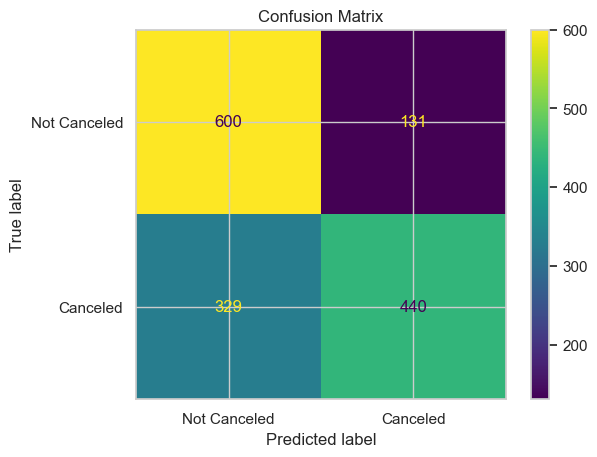

Accuracy Score:  0.6933333333333334
F-1 Score:  0.6567164179104478


In [83]:
y_predicted_ds = svm_clf.predict(X_test_ds)

cm_svc = confusion_matrix(y_test_ds, y_predicted_ds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Not Canceled', 'Canceled'])

disp.plot()
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score: ", accuracy_score(y_test_ds, y_predicted_ds))
print("F-1 Score: ", f1_score(y_test_ds, y_predicted_ds))

<pre>
From 731 not canceled booking statuses, we can see that around 83% were correctly classified.
From 769 canceled booking statuses, only around 57% were correctly classified.
</pre>

In [84]:
#Hyper Parameters tuning on Support Vector Machines with Cross Validation via GridSearchCV
svm_grid_search_cv = GridSearchCV(SVC(), {
    'C': [1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01],
    'kernel': ['rbf']
}, cv=5)

svm_grid_search_cv.fit(X_train_ds, y_train_ds)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 1, 0.1, 0.01],
                         'kernel': ['rbf']})

In [85]:
results_svm_df = pd.DataFrame(svm_grid_search_cv.cv_results_)
results_svm_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.892921,0.033879,0.385286,0.013492,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.707778,0.688889,0.660000,0.693333,0.690000,0.688000,0.015546,9
1,2.104064,0.077236,0.733621,0.047056,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.658889,0.667778,0.654444,0.663333,0.671111,0.663111,0.005979,12
2,1.766994,0.036076,0.631419,0.035292,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.695556,0.686667,0.697778,0.680000,0.685556,0.689111,0.006607,8
3,0.968233,0.028734,0.387015,0.018690,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.750000,0.747778,0.724444,0.757778,0.766667,0.749333,0.014100,3
4,0.837217,0.034810,0.361104,0.015870,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.703333,0.692222,0.667778,0.708889,0.702222,0.694889,0.014582,5
5,2.052099,0.124264,0.684840,0.055497,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.668889,0.684444,0.680000,0.677778,0.682222,0.678667,0.005370,10
6,1.600788,0.015876,0.567641,0.016154,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.696667,0.691111,0.695556,0.683333,0.696667,0.692667,0.005097,6
7,1.277533,0.093803,0.337166,0.010111,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.770000,0.757778,0.735556,0.746667,0.767778,0.755556,0.012977,2
8,0.819667,0.011619,0.337880,0.008969,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.716667,0.697778,0.678889,0.721111,0.702222,0.703333,0.014990,4
9,2.038547,0.020273,0.703556,0.033319,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.668889,0.684444,0.680000,0.677778,0.682222,0.678667,0.005370,10


In [86]:
print("Optimal Hyper Parameters:\n", svm_grid_search_cv.best_params_)

Optimal Hyper Parameters:
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


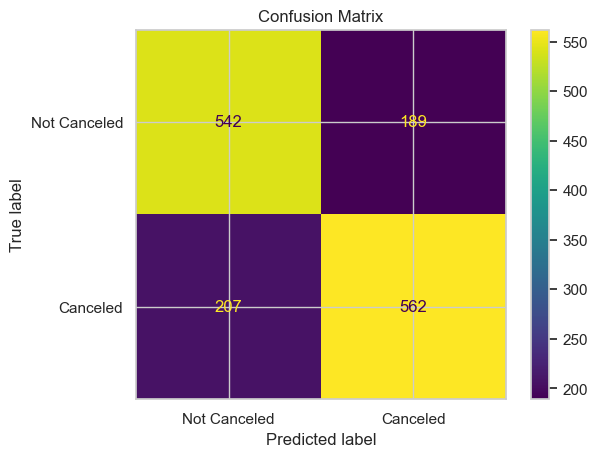

Accuracy Score:  0.736
F-1 Score:  0.7394736842105263


In [87]:
#SVC with Optimal Hyper Parameters
svm_clf_optimal = SVC(C=100, gamma=0.01, kernel='rbf', random_state=42)
svm_clf_optimal.fit(X_train_ds, y_train_ds)

y_predicted_ds_optimal = svm_clf_optimal.predict(X_test_ds)

cm_svm_optimal = confusion_matrix(y_test_ds, y_predicted_ds_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_optimal, display_labels=['Not Canceled', 'Canceled'])

disp.plot()
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score: ", accuracy_score(y_test_ds, y_predicted_ds_optimal))
print("F-1 Score: ", f1_score(y_test_ds, y_predicted_ds_optimal))

<pre>
After Hyper Parameters tuning we now have more balanced results.
From 731 not canceled booking statuses, we can see that around 74% were correctly classified.
From 769 canceled booking statuses, also around 74% were correctly classified.
</pre>